In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 10
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook_connected"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'':
  os.chdir(r'')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


C:\Users\kerry\AppData\Local\Temp\ipykernel_8912\3609341226.py:20: DeprecationWarning:

`set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`



{"C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python310\\lib\\importlib\\_bootstrap.py": 1647454514.0, "C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python310\\lib\\importlib\\_bootstrap_external.py": 1647454514.0, "C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python310\\lib\\codecs.py": 1647454514.0, "C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\aliases.py": 1647454514.0, "C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\__init__.py": 1647454514.0, "C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\utf_8.py": 1647454514.0, "C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python310\\lib\\encodings\\cp1252.py": 1647454514.0, "C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python310\\lib\\abc.py": 1647454514.0, "C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python310\\lib\\io.py": 1647454514.0, "C:\\Users\\kerry\\AppData\\Local\\Programs\\Python\\Python310\\li

C:\Users\kerry\AppData\Local\Temp\ipykernel_8912\889592775.py:6: RuntimeWarning:

divide by zero encountered in log



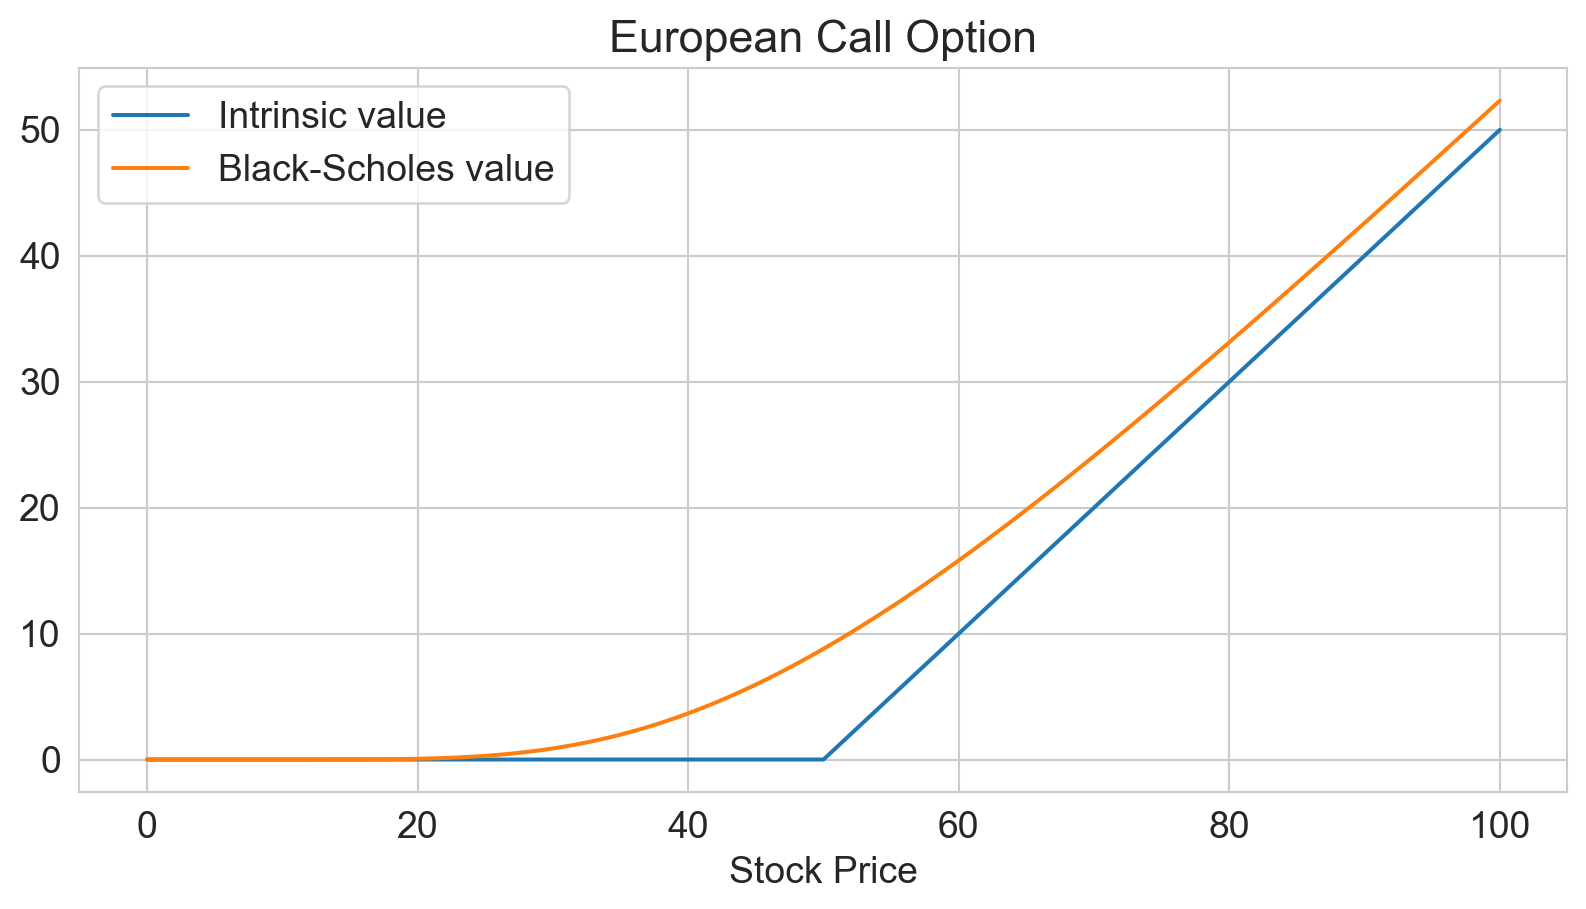

In [2]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

def callBS(S, K, T, sigma, r, q=0):
    d1 = np.log(S/K) + (r-q+0.5*sigma**2)*T
    d1 /= sigma*np.sqrt(T)
    d2 = d1 - sigma*np.sqrt(T)
    N1 = norm.cdf(d1)
    N2 = norm.cdf(d2)
    return np.exp(-q*T)*S*N1 - np.exp(-r*T)*K*N2

def putBS(S, K, T, sigma, r, q=0):
    d1 = np.log(S/K) + (r-q+0.5*sigma**2)*T
    d1 /= sigma*np.sqrt(T)
    d2 = d1 - sigma*np.sqrt(T)
    N1 = norm.cdf(-d1)
    N2 = norm.cdf(-d2)
    return np.exp(-r*T)*K*N2 - np.exp(-q*T)*S*N1

K = 50
T = 1
sigma = 0.4
r = 0.04
import seaborn as sns
sns.set_style('whitegrid')
underlying = np.linspace(0,100,101)
intrinsic = np.maximum(underlying-K, 0)
bs = [callBS(x, K, T, sigma, r) for x in underlying]

plt.rcParams.update({'font.size': 14})

plt.plot(underlying, intrinsic, label="Intrinsic value")
plt.plot(underlying, bs, label="Black-Scholes value")
plt.legend()
plt.title("European Call Option")
plt.xlabel("Stock Price")
plt.show()

C:\Users\kerry\AppData\Local\Temp\ipykernel_8912\889592775.py:14: RuntimeWarning:

divide by zero encountered in log



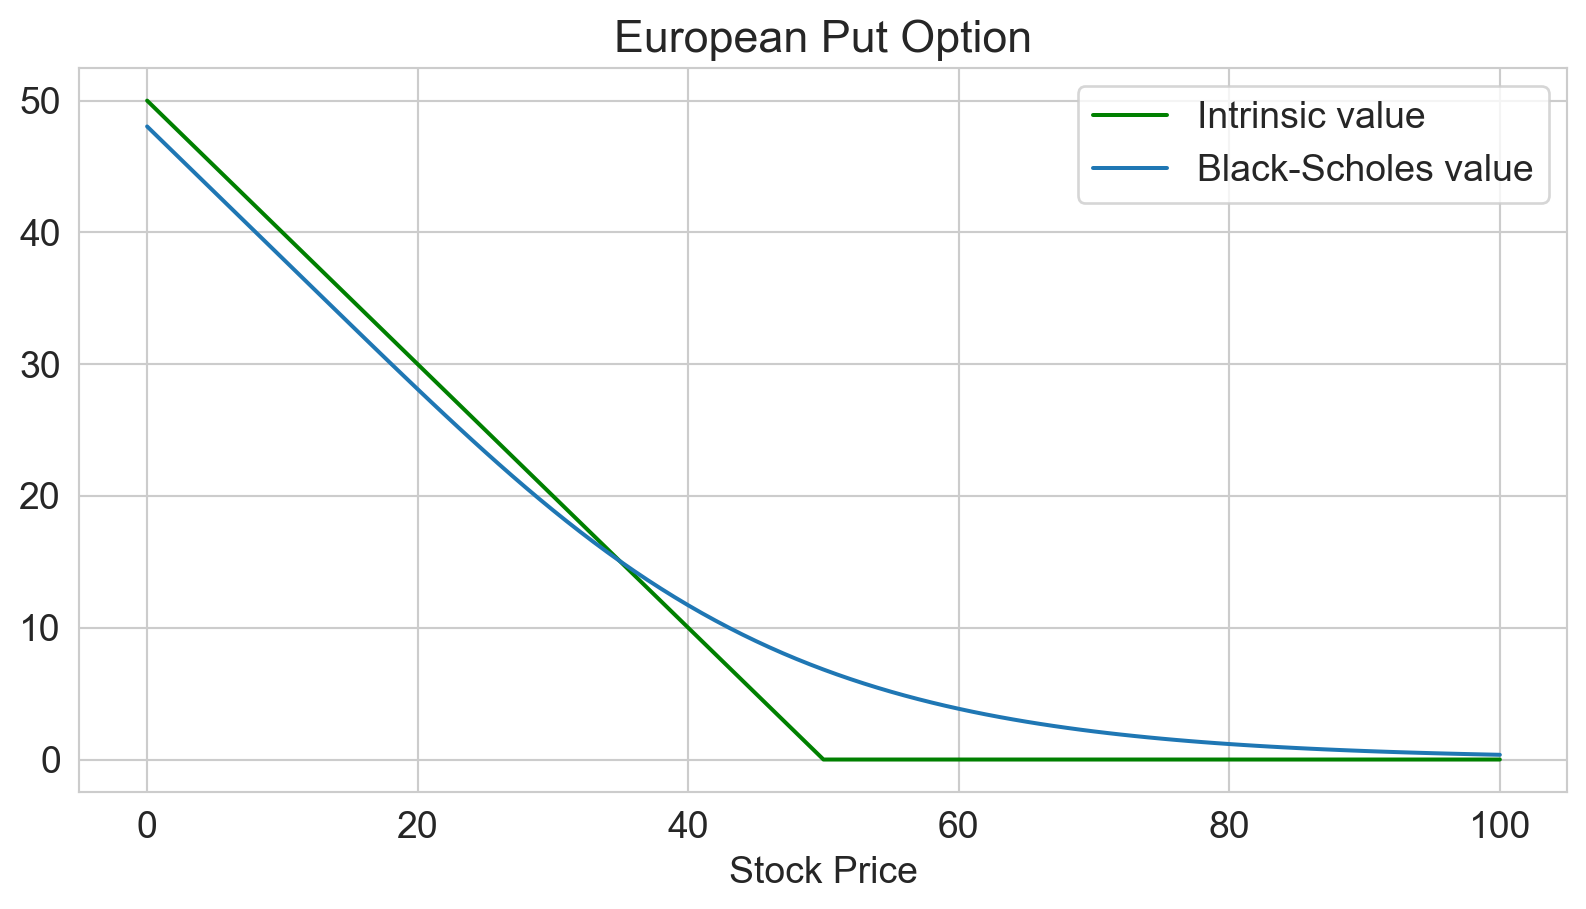

In [3]:
bs = [putBS(x, K, T, sigma, r) for x in underlying]
intrinsic = np.maximum(K-underlying, 0)
plt.plot(underlying, intrinsic, label="Intrinsic value", c='g')
plt.plot(underlying, bs, label="Black-Scholes value")
plt.xlabel("Stock Price")
plt.legend()
plt.title("European Put Option")
plt.show()